In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# print(tf.__version__)
import cv2
import glob
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
from sklearn.metrics import mean_absolute_error,mean_squared_error
import glob
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_dataset = pd.read_pickle("./train_dataset.pkl")  
test_dataset = pd.read_pickle("./test_dataset.pkl")  
test_dataset_va = pd.read_pickle("./test_dataset_va.pkl") 

# Load database

Αρχικά κάνουμε extract το database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Παρατηρούμε ότι αποτελείται από ένα train και ένα validation set. Κάνουμε extract:

In [ ]:
!tar -xvf "/content/drive/MyDrive/Διπλωματικη/train_set.tar"

Streaming output truncated to the last 5000 lines.
train_set/annotations/392066_lnd.npy
train_set/annotations/83536_lnd.npy
train_set/annotations/26361_lnd.npy
train_set/annotations/313969_aro.npy
train_set/annotations/286825_exp.npy
train_set/annotations/392215_aro.npy
train_set/annotations/330087_lnd.npy
train_set/annotations/110001_val.npy
train_set/annotations/371482_aro.npy
train_set/annotations/27940_aro.npy
train_set/annotations/35729_exp.npy
train_set/annotations/156731_aro.npy
train_set/annotations/145081_aro.npy
train_set/annotations/93043_exp.npy
train_set/annotations/279607_lnd.npy
train_set/annotations/48472_lnd.npy
train_set/annotations/206512_exp.npy
train_set/annotations/84264_aro.npy
train_set/annotations/187769_lnd.npy
train_set/annotations/300707_exp.npy
train_set/annotations/123766_exp.npy
train_set/annotations/173216_aro.npy
train_set/annotations/262096_lnd.npy
train_set/annotations/194946_aro.npy
train_set/annotations/411301_aro.npy
train_set/annotations/43103_aro

In [ ]:
!tar -xvf "/content/drive/MyDrive/Διπλωματικη/val_set.tar"

Streaming output truncated to the last 5000 lines.
val_set/annotations/678_lnd.npy
val_set/annotations/1526_lnd.npy
val_set/annotations/5420_aro.npy
val_set/annotations/4628_exp.npy
val_set/annotations/5254_lnd.npy
val_set/annotations/4769_aro.npy
val_set/annotations/1994_lnd.npy
val_set/annotations/4840_lnd.npy
val_set/annotations/3546_val.npy
val_set/annotations/2606_lnd.npy
val_set/annotations/1282_val.npy
val_set/annotations/948_lnd.npy
val_set/annotations/2672_lnd.npy
val_set/annotations/1599_aro.npy
val_set/annotations/2177_exp.npy
val_set/annotations/1830_val.npy
val_set/annotations/4676_aro.npy
val_set/annotations/3228_aro.npy
val_set/annotations/5196_aro.npy
val_set/annotations/714_val.npy
val_set/annotations/2296_exp.npy
val_set/annotations/934_lnd.npy
val_set/annotations/1511_val.npy
val_set/annotations/2923_exp.npy
val_set/annotations/4198_aro.npy
val_set/annotations/886_lnd.npy
val_set/annotations/1924_exp.npy
val_set/annotations/1462_lnd.npy
val_set/annotations/812_exp.np

Αναφορικά με τα annotations δεδομένου του μεγάλου όγκου των δεδομένων δεν μπορούμε να δούμε μέσω του colab την δομή των αρχείων. Τυπώνοντας τα περιεχόμενα του directory βλέπουμε ότι αποτελείται από npy αρχεία που αφορούν τόσο τις τιμές valence,arousal όσο και τα expressions και τα landmarks.

In [ ]:
from glob import glob
glob("/content/train_set/annotations/*", recursive = True)

['/content/train_set/annotations/109807_exp.npy',
 '/content/train_set/annotations/70341_lnd.npy',
 '/content/train_set/annotations/269360_lnd.npy',
 '/content/train_set/annotations/107159_exp.npy',
 '/content/train_set/annotations/407356_aro.npy',
 '/content/train_set/annotations/10401_val.npy',
 '/content/train_set/annotations/122180_val.npy',
 '/content/train_set/annotations/129591_val.npy',
 '/content/train_set/annotations/115900_aro.npy',
 '/content/train_set/annotations/372162_lnd.npy',
 '/content/train_set/annotations/410789_aro.npy',
 '/content/train_set/annotations/234822_lnd.npy',
 '/content/train_set/annotations/9156_val.npy',
 '/content/train_set/annotations/199070_exp.npy',
 '/content/train_set/annotations/23630_val.npy',
 '/content/train_set/annotations/267357_lnd.npy',
 '/content/train_set/annotations/71202_lnd.npy',
 '/content/train_set/annotations/412569_val.npy',
 '/content/train_set/annotations/179877_val.npy',
 '/content/train_set/annotations/51738_exp.npy',
 '/cont

Θέλουμε 4 λίστες που περιέχουν τα paths για κάθε στοιχείο, μία για το image path, μία για το valence, μία για το arousal και μία για τα expressions.

## Για το train set

In [ ]:
import glob

In [ ]:
expressions = sorted(glob.glob("/content/train_set/annotations/*_exp.npy"))
print(len(expressions))
print(type(expressions))

287651
<class 'list'>


In [ ]:
expressions_list = []
for fname in expressions:
  expressions_list.append(int(np.load(fname)))
print(len(expressions_list))

287651


In [ ]:
print(len(expressions_list))

287651


Τώρα θέλουμε να φτιάξουμε μία λίστα που περιέχει τα paths των εικόνων με την ίδια σειρά με την οποία είναι οι παραπάνω λίστες. Αυτό το πετυχαίνουμε με μία regex expression:

In [ ]:
import re
image_locations = []
for i in expressions:
    result=re.search('/content/train_set/annotations/(.*)_exp.npy', i)
    number = result.group(1)
    image_locations.append('/content/train_set/images/'+str(number)+'.jpg')
    

In [ ]:
train_dataset = pd.DataFrame(list(zip(image_locations, expressions_list)),
              columns=['file_loc','expr'])
train_dataset

In [ ]:
train_dataset.to_pickle("./train_dataset.pkl")  

In [ ]:
train_dataset = pd.read_pickle("./train_dataset.pkl")  

## Για το test set

In [ ]:
test_expressions = sorted(glob.glob("/content/val_set/annotations/*_exp.npy"))
print(len(test_expressions))
print(type(test_expressions))

3999
<class 'list'>


In [ ]:
test_expressions_list = []
test_arousal_list = []

In [ ]:
for fname in test_expressions:
  test_expressions_list.append(int(np.load(fname)))

In [ ]:
test_arousal = sorted(glob.glob("/content/val_set/annotations/*_aro.npy"))
print(len(test_arousal))
print(type(test_arousal))

3999
<class 'list'>


In [ ]:
test_valence = sorted(glob.glob("/content/val_set/annotations/*_val.npy"))
print(len(test_valence))
print(type(test_valence))
print(test_valence)

3999
<class 'list'>
['/content/val_set/annotations/0_val.npy', '/content/val_set/annotations/1001_val.npy', '/content/val_set/annotations/1002_val.npy', '/content/val_set/annotations/1003_val.npy', '/content/val_set/annotations/1007_val.npy', '/content/val_set/annotations/1008_val.npy', '/content/val_set/annotations/1009_val.npy', '/content/val_set/annotations/100_val.npy', '/content/val_set/annotations/1010_val.npy', '/content/val_set/annotations/1011_val.npy', '/content/val_set/annotations/1012_val.npy', '/content/val_set/annotations/1013_val.npy', '/content/val_set/annotations/1014_val.npy', '/content/val_set/annotations/1016_val.npy', '/content/val_set/annotations/1017_val.npy', '/content/val_set/annotations/1018_val.npy', '/content/val_set/annotations/1019_val.npy', '/content/val_set/annotations/101_val.npy', '/content/val_set/annotations/1020_val.npy', '/content/val_set/annotations/1021_val.npy', '/content/val_set/annotations/1022_val.npy', '/content/val_set/annotations/1023_val.

Τώρα θέλουμε να φτιάξουμε μία λίστα που περιέχει τα paths των εικόνων με την ίδια σειρά με την οποία είναι οι παραπάνω λίστες. Αυτό το πετυχαίνουμε με μία regex expression:

In [ ]:
test_image_locations = []
for i in test_arousal:
    # print(i)
    result=re.search('/content/val_set/annotations/(.*)_aro.npy', i)
    number = result.group(1)
    test_image_locations.append('/content/val_set/images/'+str(number)+'.jpg')

In [ ]:
print(len(test_image_locations))

3999


In [ ]:
test_dataset = pd.DataFrame(list(zip(test_image_locations, test_expressions_list)),
              columns=['file_loc','expr'])
test_dataset

,file_loc,expr
0,/content/val_set/images/0.jpg,0
1,/content/val_set/images/1001.jpg,0
2,/content/val_set/images/1002.jpg,4
3,/content/val_set/images/1003.jpg,5
4,/content/val_set/images/1007.jpg,2
...,...,...
3994,/content/val_set/images/994.jpg,1
3995,/content/val_set/images/995.jpg,1
3996,/content/val_set/images/996.jpg,6
3997,/content/val_set/images/999.jpg,3


In [ ]:
test_dataset.to_pickle("./test_dataset.pkl")  

In [ ]:
test_dataset = pd.read_pickle("./test_dataset.pkl")  

## Classification task

Έχουμε λοιπόν 4 λίστες με τα image paths, valence, arousal, expression values για το train και το test set. Θα χρησιμοποιήσουμε έναν image data generator.

###### Resnet lr = 10^-4

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=91,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)

3161


In [ ]:
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=20,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
3161/3161 [==============================] - ETA: 0s - loss: 0.7905 - accuracy: 0.7243
Epoch 1: val_accuracy improved from -inf to 0.43461, saving model to /content/weights0.4346.hdf5
3161/3161 [==============================] - 744s 229ms/step - loss: 0.7905 - accuracy: 0.7243 - val_loss: 1.7370 - val_accuracy: 0.4346
Epoch 2/20
3161/3161 [==============================] - ETA: 0s - loss: 0.6571 - accuracy: 0.7662
Epoch 2: val_accuracy improved from 0.43461 to 0.45986, saving model to /content/weights0.4599.hdf5
3161/3161 [==============================] - 687s 217ms/step - loss: 0.6571 - accuracy: 0.7662 - val_loss: 1.6786 - val_accuracy: 0.4599
Epoch 3/20
3161/3161 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.7915
Epoch 3: val_accuracy improved from 0.45986 to 0.46487, saving model to /content/weights0.4649.hdf5
3161/3161 [==============================] - 686s 217ms/step - loss: 0.5759 - accuracy: 0.7915 - val_loss: 1.7777 - val_accuracy: 0.464

In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
3161/3161 [==============================] - ETA: 0s - loss: 0.7867 - accuracy: 0.7255
Epoch 1: val_accuracy improved from -inf to 0.46437, saving model to /content/weights0.4644.hdf5
3161/3161 [==============================] - 737s 227ms/step - loss: 0.7867 - accuracy: 0.7255 - val_loss: 1.6568 - val_accuracy: 0.4644
Epoch 2/4
3161/3161 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.7676
Epoch 2: val_accuracy did not improve from 0.46437
3161/3161 [==============================] - 705s 223ms/step - loss: 0.6540 - accuracy: 0.7676 - val_loss: 1.8211 - val_accuracy: 0.4291
Epoch 3/4
3161/3161 [==============================] - ETA: 0s - loss: 0.5706 - accuracy: 0.7936
Epoch 3: val_accuracy improved from 0.46437 to 0.48212, saving model to /content/weights0.4821.hdf5
3161/3161 [==============================] - 698s 221ms/step - loss: 0.5706 - accuracy: 0.7936 - val_loss: 1.6149 - val_accuracy: 0.4821
Epoch 4/4
3161/3161 [=============================

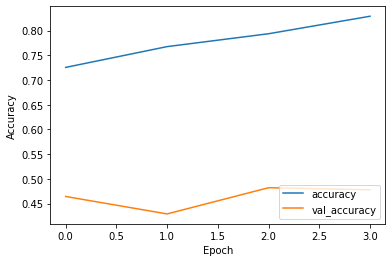

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Επομένως βλέπουμε ότι η μεγαλύτερη val_accuracy ισούται με 0.4766 και επιτυγχάνεται στις 19 εποχές

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([0, 0, 3, ..., 5, 3, 2])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4778694673668417
f1 score 0.4490198442251183
average accuracy 0.4777630260521042


### Δοκιμές με διαφορετικά batch sizes

###### Resnet batch size = 109,93

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=109,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

2639
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
2639/2639 [==============================] - ETA: 0s - loss: 0.7873 - accuracy: 0.7255
Epoch 1: val_accuracy improved from -inf to 0.42261, saving model to /content/weights0.4226.hdf5
2639/2639 [==============================] - 701s 261ms/step - loss: 0.7873 - accuracy: 0.7255 - val_loss: 1.8719 - val_accuracy: 0.4226
Epoch 2/4
2639/2639 [==============================] - ETA: 0s - loss: 0.6522 - accuracy: 0.7690
Epoch 2: val_accuracy improved from 0.42261 to 0.45761, saving model to /content/weights0.4576.hdf5
2639/2639 [==============================] - 687s 260ms/step - loss: 0.6522 - accuracy: 0.7690 - val_loss: 1.6356 - val_accuracy: 0.4576
Epoch 3/4
2639/2639 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.7939
Epoch 3: val_accuracy improved from 0.45761 to 0.48662, saving model to /content/weights0.4866.hdf5
2639/2639 [==============================] - 687s 260ms/step - loss: 0.5708 - accuracy: 0.7939 - val_loss: 1.6160 - val_accuracy: 0.4866
E

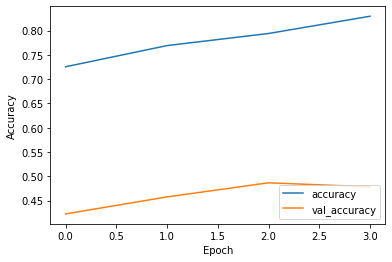

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([0, 0, 3, ..., 6, 3, 2])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4783695923980995
f1 score 0.4445981734761892
average accuracy 0.47826102204408816


###### Resnet batch size = 109,129

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=109,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=129,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') )
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

2639
31


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = final.fit_generator( #!!!
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
2639/2639 [==============================] - ETA: 0s - loss: 0.7877 - accuracy: 0.7251
Epoch 1: val_accuracy improved from -inf to 0.43261, saving model to /content/weights0.4326.hdf5
2639/2639 [==============================] - 696s 260ms/step - loss: 0.7877 - accuracy: 0.7251 - val_loss: 1.6676 - val_accuracy: 0.4326
Epoch 2/4
2639/2639 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.7680
Epoch 2: val_accuracy improved from 0.43261 to 0.44911, saving model to /content/weights0.4491.hdf5
2639/2639 [==============================] - 685s 259ms/step - loss: 0.6524 - accuracy: 0.7680 - val_loss: 1.7980 - val_accuracy: 0.4491
Epoch 3/4
2639/2639 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.7946
Epoch 3: val_accuracy improved from 0.44911 to 0.48212, saving model to /content/weights0.4821.hdf5
2639/2639 [==============================] - 685s 259ms/step - loss: 0.5699 - accuracy: 0.7946 - val_loss: 1.6628 - val_accuracy: 0.4821
E

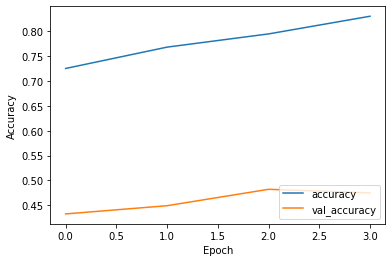

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([0, 0, 3, ..., 6, 3, 2])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4748687171792948
f1 score 0.43448288595156626
average accuracy 0.4747590180360721


###### Resnet batch size = 109,43

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=109,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=43,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

2639
93


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
2639/2639 [==============================] - ETA: 0s - loss: 0.7900 - accuracy: 0.7244
Epoch 1: val_accuracy improved from -inf to 0.43861, saving model to /content/weights0.4386.hdf5
2639/2639 [==============================] - 694s 261ms/step - loss: 0.7900 - accuracy: 0.7244 - val_loss: 1.7215 - val_accuracy: 0.4386
Epoch 2/4
2639/2639 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.7680
Epoch 2: val_accuracy improved from 0.43861 to 0.44686, saving model to /content/weights0.4469.hdf5
2639/2639 [==============================] - 685s 260ms/step - loss: 0.6528 - accuracy: 0.7680 - val_loss: 1.7216 - val_accuracy: 0.4469
Epoch 3/4
2639/2639 [==============================] - ETA: 0s - loss: 0.5702 - accuracy: 0.7941
Epoch 3: val_accuracy improved from 0.44686 to 0.46312, saving model to /content/weights0.4631.hdf5
2639/2639 [==============================] - 688s 261ms/step - loss: 0.5702 - accuracy: 0.7941 - val_loss: 1.7477 - val_accuracy: 0.4631
E

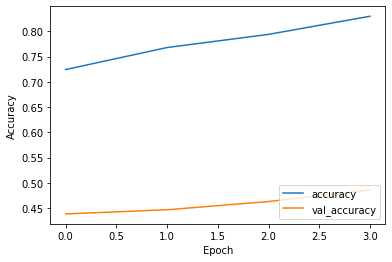

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([6, 0, 3, ..., 6, 3, 2])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4858714678669667
f1 score 0.4543405634885387
average accuracy 0.4857630260521042


#### Resnet batch size=203,93 (best batch size number)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
1417/1417 [==============================] - ETA: 0s - loss: 0.8032 - accuracy: 0.7200
Epoch 1: val_accuracy improved from -inf to 0.45136, saving model to /content/weights0.4514.hdf5
1417/1417 [==============================] - 635s 441ms/step - loss: 0.8032 - accuracy: 0.7200 - val_loss: 1.7118 - val_accuracy: 0.4514
Epoch 2/4
1417/1417 [==============================] - ETA: 0s - loss: 0.6483 - accuracy: 0.7694
Epoch 2: val_accuracy improved from 0.45136 to 0.46887, saving model to /content/weights0.4689.hdf5
1417/1417 [==============================] - 626s 442ms/step - loss: 0.6483 - accuracy: 0.7694 - val_loss: 1.6113 - val_accuracy: 0.4689
Epoch 3/4
1417/1417 [==============================] - ETA: 0s - loss: 0.5576 - accuracy: 0.7987
Epoch 3: val_accuracy improved from 0.46887 to 0.47537, saving model to /content/weights0.4754.hdf5
1417/1417 [==============================] - 622s 439ms/step - loss: 0.5576 - accuracy: 0.7987 - val_loss: 1.7594 - val_accuracy: 0.4754
E

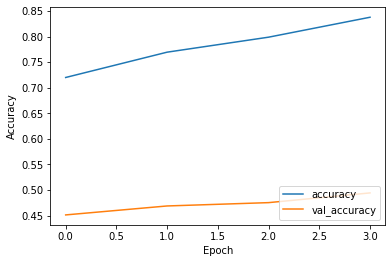

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([0, 0, 3, ..., 6, 4, 2])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4943735933983496
f1 score 0.4605615419857453
average accuracy 0.49426503006012024


##### Lr=10^-4 (baseline without data augmentation)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
 test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.8006 - accuracy: 0.7212
Epoch 1: val_accuracy improved from -inf to 0.42836, saving model to /content/weights0.4284.hdf5
1417/1417 [==============================] - 675s 462ms/step - loss: 0.8006 - accuracy: 0.7212 - val_loss: 1.7096 - val_accuracy: 0.4284
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6460 - accuracy: 0.7705
Epoch 2: val_accuracy improved from 0.42836 to 0.47087, saving model to /content/weights0.4709.hdf5
1417/1417 [==============================] - 604s 426ms/step - loss: 0.6460 - accuracy: 0.7705 - val_loss: 1.6250 - val_accuracy: 0.4709
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.7999
Epoch 3: val_accuracy did not improve from 0.47087
1417/1417 [==============================] - 601s 424ms/step - loss: 0.5553 - accuracy: 0.7999 - val_loss: 1.6810 - val_accuracy: 0.4664
Epoch 4/5
1417/1417 [=============================

In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.2211 - accuracy: 0.9212
Epoch 1: val_accuracy improved from -inf to 0.48062, saving model to /content/weights0.4806.hdf5
1417/1417 [==============================] - 607s 428ms/step - loss: 0.2211 - accuracy: 0.9212 - val_loss: 2.5324 - val_accuracy: 0.4806
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1655 - accuracy: 0.9436
Epoch 2: val_accuracy improved from 0.48062 to 0.48787, saving model to /content/weights0.4879.hdf5
1417/1417 [==============================] - 602s 424ms/step - loss: 0.1655 - accuracy: 0.9436 - val_loss: 2.7225 - val_accuracy: 0.4879
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1344 - accuracy: 0.9544
Epoch 3: val_accuracy did not improve from 0.48787
1417/1417 [==============================] - 599s 423ms/step - loss: 0.1344 - accuracy: 0.9544 - val_loss: 3.0201 - val_accuracy: 0.4831
Epoch 4/5
1417/1417 [=============================

In [ ]:
model_resnet = tf.keras.models.load_model("/content/weights0.4896.hdf5")

In [ ]:
y_pred = model_resnet.predict(test_generator)
y_pred_max = np.argmax(y_pred, axis=1)
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.48962240560140036
f1 score 0.4564191934819186
average accuracy 0.4895120240480962


In [ ]:
# print("accuracy",accuracy_score(y_true, y_pred_max))
from sklearn.metrics import classification_report
print("f1 score per class \n",f1_score(y_true, y_pred_max,average=None))
print("accuracy per class \n",confusion_matrix(y_true, y_pred_max, normalize='true').diagonal())
# print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

f1 score per class 
 [0.45707376 0.63216011 0.54966249 0.49122807 0.52987013 0.374034
 0.52589641 0.09142857]
accuracy per class 
 [0.756      0.916      0.57       0.448      0.408      0.242
 0.528      0.04809619]


#### Δοκιμές με data augmentation

Αφού βρήκαμε ότι το καλύτερο batch size έιναι 203 για το train set και 93 για το test set, κρατήσαμε αυτές τις παραμέτρους και δοκιμάσαμε την μέθοδο data augmentation.

###### Μόνο horizontal flip (baseline with data augmentation)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.8048 - accuracy: 0.7199
Epoch 1: val_accuracy improved from -inf to 0.45361, saving model to /content/weights0.4536.hdf5
1417/1417 [==============================] - 698s 477ms/step - loss: 0.8048 - accuracy: 0.7199 - val_loss: 1.6415 - val_accuracy: 0.4536
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.7628
Epoch 2: val_accuracy improved from 0.45361 to 0.46637, saving model to /content/weights0.4664.hdf5
1417/1417 [==============================] - 630s 444ms/step - loss: 0.6686 - accuracy: 0.7628 - val_loss: 1.6247 - val_accuracy: 0.4664
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6186 - accuracy: 0.7787
Epoch 3: val_accuracy did not improve from 0.46637
1417/1417 [==============================] - 627s 442ms/step - loss: 0.6186 - accuracy: 0.7787 - val_loss: 1.7367 - val_accuracy: 0.4586
Epoch 4/5
1417/1417 [=============================

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([0, 0, 3, ..., 6, 4, 2])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

Το νέο με data augmentation:

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.5026256564141035
f1 score 0.4619420081407059
average accuracy 0.5025075150300601


###### Horizontal flip με loss kl-divergence

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss='kl_divergence', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
1417/1417 [==============================] - ETA: 0s - loss: 12.3236 - accuracy: 0.1068
Epoch 1: val_accuracy improved from -inf to 0.13003, saving model to /content/weights0.1300.hdf5
1417/1417 [==============================] - 625s 437ms/step - loss: 12.3236 - accuracy: 0.1068 - val_loss: 14.5558 - val_accuracy: 0.1300
Epoch 2/10
1417/1417 [==============================] - ETA: 0s - loss: 12.3055 - accuracy: 0.0982
Epoch 2: val_accuracy did not improve from 0.13003
1417/1417 [==============================] - 617s 435ms/step - loss: 12.3055 - accuracy: 0.0982 - val_loss: 14.5558 - val_accuracy: 0.1260
Epoch 3/10
1417/1417 [==============================] - ETA: 0s - loss: 12.3055 - accuracy: 0.1104
Epoch 3: val_accuracy did not improve from 0.13003
1417/1417 [==============================] - 618s 436ms/step - loss: 12.3055 - accuracy: 0.1104 - val_loss: 14.5561 - val_accuracy: 0.1260
Epoch 4/10
1417/1417 [==============================] - ETA: 0s - loss: 12.3054 - accur

Με 0.0001

In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 12.3059 - accuracy: 0.0946
Epoch 1: val_accuracy improved from -inf to 0.12703, saving model to /content/weights0.1270.hdf5
1417/1417 [==============================] - 614s 433ms/step - loss: 12.3059 - accuracy: 0.0946 - val_loss: 14.5558 - val_accuracy: 0.1270
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 12.3057 - accuracy: 0.0838
Epoch 2: val_accuracy did not improve from 0.12703
1417/1417 [==============================] - 616s 435ms/step - loss: 12.3057 - accuracy: 0.0838 - val_loss: 14.5565 - val_accuracy: 0.1208
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 12.3056 - accuracy: 0.1102
Epoch 3: val_accuracy did not improve from 0.12703
1417/1417 [==============================] - 618s 436ms/step - loss: 12.3056 - accuracy: 0.1102 - val_loss: 14.5570 - val_accuracy: 0.1268
Epoch 4/5
1417/1417 [==============================] - ETA: 0s - loss: 12.3056 - accuracy:

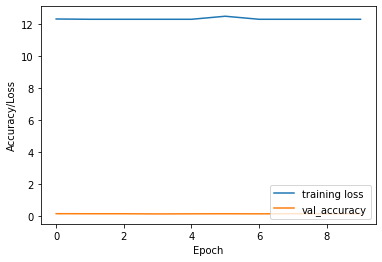

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([7, 7, 7, ..., 7, 7, 7])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.11877969492373093
f1 score 0.06907785378739434
average accuracy 0.11892334669338678


###### Horizontal flip και rotation range 10

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=10)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.8137 - accuracy: 0.7166
Epoch 1: val_accuracy improved from -inf to 0.40485, saving model to /content/weights0.4049.hdf5
1417/1417 [==============================] - 1165s 807ms/step - loss: 0.8137 - accuracy: 0.7166 - val_loss: 1.8360 - val_accuracy: 0.4049
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.7575
Epoch 2: val_accuracy improved from 0.40485 to 0.44186, saving model to /content/weights0.4419.hdf5
1417/1417 [==============================] - 1046s 738ms/step - loss: 0.6852 - accuracy: 0.7575 - val_loss: 1.7248 - val_accuracy: 0.4419
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6478 - accuracy: 0.7681
Epoch 3: val_accuracy improved from 0.44186 to 0.49312, saving model to /content/weights0.4931.hdf5
1417/1417 [==============================] - 1003s 708ms/step - loss: 0.6478 - accuracy: 0.7681 - val_loss: 1.5203 - val_accuracy: 0.493

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4553638409602401
f1 score 0.41583908139023285
average accuracy 0.45525250501002


###### Horizontal flip και rotation range 20

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=20)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.8265 - accuracy: 0.7114
Epoch 1: val_accuracy improved from -inf to 0.42211, saving model to /content/weights0.4221.hdf5
1417/1417 [==============================] - 1031s 723ms/step - loss: 0.8265 - accuracy: 0.7114 - val_loss: 1.7654 - val_accuracy: 0.4221
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.7033 - accuracy: 0.7530
Epoch 2: val_accuracy improved from 0.42211 to 0.42711, saving model to /content/weights0.4271.hdf5
1417/1417 [==============================] - 1010s 713ms/step - loss: 0.7033 - accuracy: 0.7530 - val_loss: 1.8100 - val_accuracy: 0.4271
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6680 - accuracy: 0.7624
Epoch 3: val_accuracy improved from 0.42711 to 0.42936, saving model to /content/weights0.4294.hdf5
1417/1417 [==============================] - 1009s 712ms/step - loss: 0.6680 - accuracy: 0.7624 - val_loss: 1.8700 - val_accuracy: 0.429

In [ ]:
y_pred = model_resnet.predict(test_generator)
y_pred_max = np.argmax(y_pred, axis=1)
y_true = test_dataset["expr"].to_numpy()

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.46886721680420107
f1 score 0.4321292230452175
average accuracy 0.46875200400801603


###### Horizontal flip και rotation range 20 και brightness range [0.3,0.9]

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=20,brightness_range=[0.3,0.9])

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.8320 - accuracy: 0.7101
Epoch 1: val_accuracy improved from -inf to 0.43936, saving model to /content/weights0.4394.hdf5
1417/1417 [==============================] - 1135s 798ms/step - loss: 0.8320 - accuracy: 0.7101 - val_loss: 1.7190 - val_accuracy: 0.4394
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.7048 - accuracy: 0.7515
Epoch 2: val_accuracy did not improve from 0.43936
1417/1417 [==============================] - 1120s 790ms/step - loss: 0.7048 - accuracy: 0.7515 - val_loss: 1.7695 - val_accuracy: 0.4331
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.7613
Epoch 3: val_accuracy improved from 0.43936 to 0.44261, saving model to /content/weights0.4426.hdf5
1417/1417 [==============================] - 1120s 790ms/step - loss: 0.6723 - accuracy: 0.7613 - val_loss: 1.6852 - val_accuracy: 0.4426
Epoch 4/5
1417/1417 [==========================

In [ ]:
y_pred = model_resnet.predict(test_generator)
y_pred_max = np.argmax(y_pred, axis=1)
y_true = test_dataset["expr"].to_numpy()

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.463615903975994
f1 score 0.41779200470557465
average accuracy 0.46350200400801606


#### Δοκιμές με learning rate

###### Lr = 0.0003

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
1417/1417 [==============================] - ETA: 0s - loss: 0.7774 - accuracy: 0.7294
Epoch 1: val_accuracy improved from -inf to 0.42011, saving model to /content/weights0.4201.hdf5
1417/1417 [==============================] - 629s 440ms/step - loss: 0.7774 - accuracy: 0.7294 - val_loss: 1.7645 - val_accuracy: 0.4201
Epoch 2/4
1417/1417 [==============================] - ETA: 0s - loss: 0.6681 - accuracy: 0.7622
Epoch 2: val_accuracy improved from 0.42011 to 0.42361, saving model to /content/weights0.4236.hdf5
1417/1417 [==============================] - 622s 439ms/step - loss: 0.6681 - accuracy: 0.7622 - val_loss: 1.8291 - val_accuracy: 0.4236
Epoch 3/4
1417/1417 [==============================] - ETA: 0s - loss: 0.6115 - accuracy: 0.7812
Epoch 3: val_accuracy improved from 0.42361 to 0.48537, saving model to /content/weights0.4854.hdf5
1417/1417 [==============================] - 622s 439ms/step - loss: 0.6115 - accuracy: 0.7812 - val_loss: 1.5364 - val_accuracy: 0.4854
E

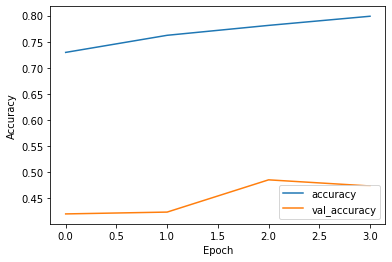

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([2, 0, 3, ..., 6, 3, 0])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.4736184046011503
f1 score 0.43838767738205797
average accuracy 0.4735050100200401


###### Lr = 0.00009

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset,x_col="file_loc",y_col='expr',target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(8, activation='softmax',name='output') ) #we want 7 expressions so we put 7 in order to have a valid range of [0, 8)
model_resnet.compile( loss="sparse_categorical_crossentropy" , optimizer=tf.keras.optimizers.Adam(learning_rate=0.00009)  ,metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=4,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/4
1417/1417 [==============================] - ETA: 0s - loss: 0.8052 - accuracy: 0.7192
Epoch 1: val_accuracy improved from -inf to 0.42936, saving model to /content/weights0.4294.hdf5
1417/1417 [==============================] - 630s 440ms/step - loss: 0.8052 - accuracy: 0.7192 - val_loss: 1.8321 - val_accuracy: 0.4294
Epoch 2/4
1417/1417 [==============================] - ETA: 0s - loss: 0.6464 - accuracy: 0.7701
Epoch 2: val_accuracy improved from 0.42936 to 0.47187, saving model to /content/weights0.4719.hdf5
1417/1417 [==============================] - 623s 439ms/step - loss: 0.6464 - accuracy: 0.7701 - val_loss: 1.6748 - val_accuracy: 0.4719
Epoch 3/4
1417/1417 [==============================] - ETA: 0s - loss: 0.5500 - accuracy: 0.8012
Epoch 3: val_accuracy did not improve from 0.47187
1417/1417 [==============================] - 621s 438ms/step - loss: 0.5500 - accuracy: 0.8012 - val_loss: 1.7163 - val_accuracy: 0.4631
Epoch 4/4
1417/1417 [=============================

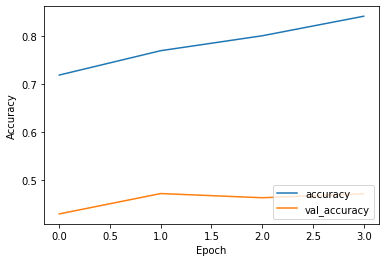

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_resnet.predict(test_generator)

In [ ]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

array([0, 0, 4, ..., 6, 3, 0])

In [ ]:
y_true = test_dataset["expr"].to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true, y_pred_max))
print("f1 score",f1_score(y_true, y_pred_max,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true, y_pred_max, normalize='true').diagonal()))

accuracy 0.47136784196049014
f1 score 0.4396024135864229
average accuracy 0.47126002004008016


## Regression task (baseline without data augmentation)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=["valence","arousal"],target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=["valence","arousal"],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling= "avg" ,
    classes=2
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(2,name='output') )

model_resnet.compile( loss='mean_squared_error' , optimizer='adam' ,metrics=['mean_squared_error']) 

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model_path = f"/content/weights" + "{val_mean_squared_error:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_mean_squared_error',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1: val_mean_squared_error improved from inf to 0.16815, saving model to /content/weights0.1682.hdf5
1417/1417 [==============================] - 688s 471ms/step - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.1682 - val_mean_squared_error: 0.1682
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 2: val_mean_squared_error improved from 0.16815 to 0.16057, saving model to /content/weights0.1606.hdf5
1417/1417 [==============================] - 617s 435ms/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1606 - val_mean_squared_error: 0.1606
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 3: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 615s 434ms/step - loss: 0.0717 - mean_squar

In [ ]:
history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0683 - mean_squared_error: 0.0683
Epoch 1: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 615s 434ms/step - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.1669 - val_mean_squared_error: 0.1669
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 2: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 614s 433ms/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 3: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 614s 433ms/step - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.1631 - val_mean_squared_error: 0.1631
Epoch 4/5
1417/1417 [====

In [ ]:
history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 1: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 614s 433ms/step - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 2: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 613s 433ms/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 3: val_mean_squared_error did not improve from 0.16057
1417/1417 [==============================] - 614s 433ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 4/5
1417/1417 [====

In [ ]:
model_resnet = tf.keras.models.load_model("/content/weights0.1606.hdf5")

In [ ]:
y_pred = model_resnet.predict(test_generator)
y_test = test_dataset_va[["valence", "arousal"]].to_numpy()

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))
print("Pearson valence",float(pearson(y_pred[:, 0].astype('float32'),y_test[:, 0].astype('float32'))))
print("Pearson arousal",float(pearson(y_pred[:, 1].astype('float32'),y_test[:, 1].astype('float32'))))

MSE 0.16056725224736346
Pearson valence 0.5664459466934204
Pearson arousal 0.49518609046936035


### Data augmentation (baseline with data augmentation)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=["valence","arousal"],target_size=(96, 96),batch_size=203,class_mode="raw")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=["valence","arousal"],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="raw")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


In [ ]:
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling= "avg" ,
    classes=2
)
for layer in resnet.layers:
    layer.trainable = True

model_resnet = tf.keras.Sequential()
model_resnet.add(resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(2,name='output') )

model_resnet.compile( loss='mean_squared_error' , optimizer='adam' ,metrics=['mean_squared_error']) 

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
model_path = f"/content/weights" + "{val_mean_squared_error:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_mean_squared_error',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 1: val_mean_squared_error improved from inf to 0.17490, saving model to /content/weights0.1749.hdf5
1417/1417 [==============================] - 684s 467ms/step - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.1749 - val_mean_squared_error: 0.1749
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 2: val_mean_squared_error improved from 0.17490 to 0.14963, saving model to /content/weights0.1496.hdf5
1417/1417 [==============================] - 624s 440ms/step - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 3/5
1417/1417 [==============================] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 3: val_mean_squared_error did not improve from 0.14963
1417/1417 [==============================] - 623s 439ms/step - loss: 0.0741 - mean_squar

In [ ]:
model_path = f"/content/weights" + "{val_mean_squared_error:.4f}.hdf5"


checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_mean_squared_error',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model_resnet.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
1417/1417 [==============================] - ETA: 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 1: val_mean_squared_error improved from inf to 0.17117, saving model to /content/weights0.1712.hdf5
1417/1417 [==============================] - 692s 466ms/step - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.1712 - val_mean_squared_error: 0.1712
Epoch 2/10
1417/1417 [==============================] - ETA: 0s - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 2: val_mean_squared_error did not improve from 0.17117
1417/1417 [==============================] - 619s 437ms/step - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.1749 - val_mean_squared_error: 0.1749
Epoch 3/10
1417/1417 [==============================] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 3: val_mean_squared_error did not improve from 0.17117
1417/1417 [==============================] - 617s 435ms/step - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1832 - val_mean

In [ ]:
model_resnet = tf.keras.models.load_model("/content/weights0.1496.hdf5")

In [ ]:
y_pred = model_resnet.predict(test_generator)
y_test = test_dataset_va[["valence", "arousal"]].to_numpy()

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))
print("Pearson valence",float(pearson(y_pred[:, 0].astype('float32'),y_test[:, 0].astype('float32'))))
print("Pearson arousal",float(pearson(y_pred[:, 1].astype('float32'),y_test[:, 1].astype('float32'))))

MSE 0.15045446252575168
Pearson valence 0.5799151062965393
Pearson arousal 0.4376331567764282


## Multi task

In [ ]:
train_dataset = pd.read_pickle("./train_dataset.pkl")  
test_dataset = pd.read_pickle("./test_dataset.pkl")  
test_dataset_va = pd.read_pickle("./test_dataset_va.pkl") 

### Δοκιμές με learning rate

#### lr = 10^-4

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=203,class_mode="multi_output")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="multi_output")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


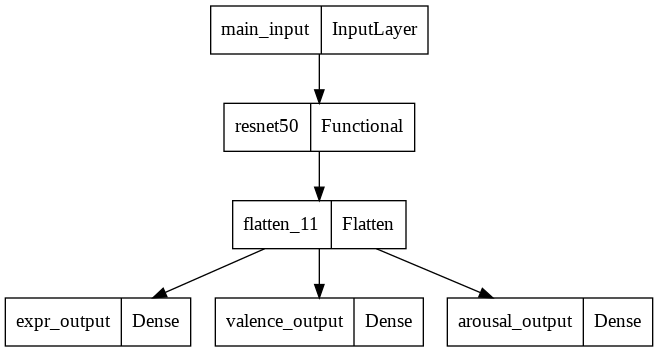

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)

for layer in resnet.layers:
    layer.trainable = True

inputs = Input(shape=(96, 96, 3), name='main_input')
main_branch = resnet(inputs)
main_branch = Flatten()(main_branch)
expr_branch = Dense(8, activation='softmax', name='expr_output')(main_branch)
valence_branch = Dense(1, name='valence_output')(main_branch)
arousal_branch = Dense(1, name='arousal_output')(main_branch)
model = Model(inputs = inputs,
     outputs = [expr_branch, valence_branch, arousal_branch])
plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss={'expr_output': 'sparse_categorical_crossentropy', 'valence_output': 'mean_squared_error', 'arousal_output': 'mean_squared_error'},metrics={'expr_output': 'accuracy',
        'valence_output': tf.keras.metrics.MeanSquaredError(),
        'arousal_output': tf.keras.metrics.MeanSquaredError()})

In [ ]:
import keras

model_path = f"/content/weights" + "{val_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
1417/1417 [==============================] - ETA: 0s - loss: 1.0970 - expr_output_loss: 0.8483 - valence_output_loss: 0.1413 - arousal_output_loss: 0.1075 - expr_output_accuracy: 0.7054 - valence_output_mean_squared_error: 0.1413 - arousal_output_mean_squared_error: 0.1075
Epoch 1: saving model to /content/weights0.4191.hdf5
1417/1417 [==============================] - 620s 433ms/step - loss: 1.0970 - expr_output_loss: 0.8483 - valence_output_loss: 0.1413 - arousal_output_loss: 0.1075 - expr_output_accuracy: 0.7054 - valence_output_mean_squared_error: 0.1413 - arousal_output_mean_squared_error: 0.1075 - val_loss: 2.0632 - val_expr_output_loss: 1.7244 - val_valence_output_loss: 0.2032 - val_arousal_output_loss: 0.1356 - val_expr_output_accuracy: 0.4191 - val_valence_output_mean_squared_error: 0.2032 - val_arousal_output_mean_squared_error: 0.1356
Epoch 2/10
1417/1417 [==============================] - ETA: 0s - loss: 0.8195 - expr_output_loss: 0.6718 - valence_output_loss: 0.

In [ ]:
history = model.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.5125 - expr_output_loss: 0.4103 - valence_output_loss: 0.0586 - arousal_output_loss: 0.0436 - expr_output_accuracy: 0.8521 - valence_output_mean_squared_error: 0.0586 - arousal_output_mean_squared_error: 0.0436
Epoch 1: saving model to /content/weights0.4769.hdf5
1417/1417 [==============================] - 637s 446ms/step - loss: 0.5125 - expr_output_loss: 0.4103 - valence_output_loss: 0.0586 - arousal_output_loss: 0.0436 - expr_output_accuracy: 0.8521 - valence_output_mean_squared_error: 0.0586 - arousal_output_mean_squared_error: 0.0436 - val_loss: 2.1463 - val_expr_output_loss: 1.8324 - val_valence_output_loss: 0.1791 - val_arousal_output_loss: 0.1348 - val_expr_output_accuracy: 0.4769 - val_valence_output_mean_squared_error: 0.1791 - val_arousal_output_mean_squared_error: 0.1348
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.4027 - expr_output_loss: 0.3142 - valence_output_loss: 0.05

In [ ]:
history = model.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1963 - expr_output_loss: 0.1339 - valence_output_loss: 0.0358 - arousal_output_loss: 0.0267 - expr_output_accuracy: 0.9534 - valence_output_mean_squared_error: 0.0358 - arousal_output_mean_squared_error: 0.0267
Epoch 1: saving model to /content/weights0.4696.hdf5
1417/1417 [==============================] - 625s 441ms/step - loss: 0.1963 - expr_output_loss: 0.1339 - valence_output_loss: 0.0358 - arousal_output_loss: 0.0267 - expr_output_accuracy: 0.9534 - valence_output_mean_squared_error: 0.0358 - arousal_output_mean_squared_error: 0.0267 - val_loss: 3.5435 - val_expr_output_loss: 3.2136 - val_valence_output_loss: 0.1867 - val_arousal_output_loss: 0.1432 - val_expr_output_accuracy: 0.4696 - val_valence_output_mean_squared_error: 0.1867 - val_arousal_output_mean_squared_error: 0.1432
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1801 - expr_output_loss: 0.1202 - valence_output_loss: 0.03

In [ ]:
history = model.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1424 - expr_output_loss: 0.0892 - valence_output_loss: 0.0302 - arousal_output_loss: 0.0230 - expr_output_accuracy: 0.9675 - valence_output_mean_squared_error: 0.0302 - arousal_output_mean_squared_error: 0.0230
Epoch 1: saving model to /content/weights0.4691.hdf5
1417/1417 [==============================] - 631s 445ms/step - loss: 0.1424 - expr_output_loss: 0.0892 - valence_output_loss: 0.0302 - arousal_output_loss: 0.0230 - expr_output_accuracy: 0.9675 - valence_output_mean_squared_error: 0.0302 - arousal_output_mean_squared_error: 0.0230 - val_loss: 3.9399 - val_expr_output_loss: 3.5934 - val_valence_output_loss: 0.2010 - val_arousal_output_loss: 0.1454 - val_expr_output_accuracy: 0.4691 - val_valence_output_mean_squared_error: 0.2010 - val_arousal_output_mean_squared_error: 0.1454
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.1332 - expr_output_loss: 0.0819 - valence_output_loss: 0.02

In [ ]:
model.load_weights("/content/weights0.4991.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
print(y_true_expr)
print(y_true_valence)
print(y_true_arousal)

[0 0 4 ... 6 3 0]
[-0.176846 -0.135501 -0.11451  ... -0.416183  0.176846 -0.147493]
[-0.0776398   0.00483933  0.857748   ...  0.701703    0.599551
 -0.379267  ]


In [ ]:
print("Expression preds \n", y_pred[0])
print("Valence preds \n", y_pred[1])
print("Arousal preds \n", y_pred[2])

Expression preds 
 [[8.0664855e-01 3.2431632e-04 9.4737045e-02 ... 1.4700019e-04
  9.7428016e-02 2.7874246e-04]
 [9.9927241e-01 2.4525849e-05 4.0002102e-05 ... 3.7771008e-07
  6.6220359e-04 4.2111392e-08]
 [3.2455671e-05 4.4132998e-06 1.4136990e-05 ... 3.0453059e-06
  2.5158652e-04 4.5445836e-07]
 ...
 [9.9240351e-05 9.9896060e-06 9.7869357e-05 ... 9.1738141e-01
  8.2358561e-02 3.2431177e-05]
 [1.6665208e-01 5.9961581e-05 1.0539325e-02 ... 3.3777547e-03
  1.7603784e-04 2.2614401e-04]
 [7.4774140e-01 9.3759780e-05 8.5509859e-02 ... 6.0767721e-04
  1.3889243e-01 2.2747490e-04]]
Valence preds 
 [[-0.21777315]
 [-0.11488184]
 [-0.10188302]
 ...
 [-0.5328994 ]
 [ 0.00688411]
 [-0.21839513]]
Arousal preds 
 [[ 0.12910503]
 [-0.09213972]
 [ 0.78491163]
 ...
 [ 0.65845454]
 [ 0.59047157]
 [-0.01836718]]


In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
y_pred_expr

array([0, 0, 4, ..., 5, 3, 0])

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.49912478119529885
f1 score 0.4678457658705708
average accuracy 0.49900751503006013
f1 score per class 
 [0.45571096 0.66182874 0.55626327 0.49061033 0.52021563 0.46318608
 0.53658537 0.05836576]
accuracy per class 
 [0.782      0.912      0.524      0.418      0.386      0.346
 0.594      0.03006012]


Regression metrics

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.15889551068971514
ΜSΕ arousal 0.13062164684633662
Pearson valence -1.2266448967679366e-10
Pearson arousal -2.182051588028866e-11


#### lr = 10^-3 (baseline without data augmentation)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=203,class_mode="multi_output")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="multi_output")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


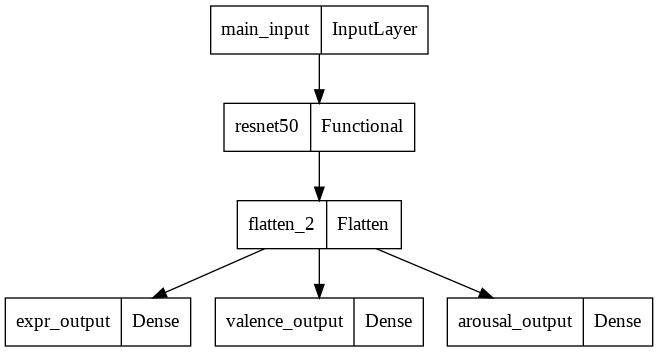

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)

for layer in resnet.layers:
    layer.trainable = True

inputs = Input(shape=(96, 96, 3), name='main_input')
main_branch = resnet(inputs)
main_branch = Flatten()(main_branch)
expr_branch = Dense(8, activation='softmax', name='expr_output')(main_branch)
valence_branch = Dense(1, name='valence_output')(main_branch)
arousal_branch = Dense(1, name='arousal_output')(main_branch)
model = Model(inputs = inputs,
     outputs = [expr_branch, valence_branch, arousal_branch])
plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss={'expr_output': 'sparse_categorical_crossentropy', 'valence_output': 'mean_squared_error', 'arousal_output': 'mean_squared_error'},metrics={'expr_output': 'accuracy',
        'valence_output': 'mean_squared_error',
        'arousal_output': 'mean_squared_error'})

In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
1417/1417 [==============================] - ETA: 0s - loss: 0.9946 - expr_output_loss: 0.7957 - valence_output_loss: 0.1194 - arousal_output_loss: 0.0796 - expr_output_accuracy: 0.7220 - valence_output_mean_squared_error: 0.1194 - arousal_output_mean_squared_error: 0.0796
Epoch 1: saving model to /content/weights0.4209.hdf5
1417/1417 [==============================] - 609s 425ms/step - loss: 0.9946 - expr_output_loss: 0.7957 - valence_output_loss: 0.1194 - arousal_output_loss: 0.0796 - expr_output_accuracy: 0.7220 - valence_output_mean_squared_error: 0.1194 - arousal_output_mean_squared_error: 0.0796 - val_loss: 2.1366 - val_expr_output_loss: 1.8130 - val_valence_output_loss: 0.1970 - val_arousal_output_loss: 0.1266 - val_expr_output_accuracy: 0.4209 - val_valence_output_mean_squared_error: 0.1970 - val_arousal_output_mean_squared_error: 0.1266
Epoch 2/10
1417/1417 [==============================] - ETA: 0s - loss: 0.8550 - expr_output_loss: 0.7048 - valence_output_loss: 0.

In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
1417/1417 [==============================] - ETA: 0s - loss: 1.0104 - expr_output_loss: 0.8012 - valence_output_loss: 0.1259 - arousal_output_loss: 0.0833 - expr_output_accuracy: 0.7202 - valence_output_mean_squared_error: 0.1259 - arousal_output_mean_squared_error: 0.0833
Epoch 1: saving model to /content/weights0.3886.hdf5
1417/1417 [==============================] - 610s 426ms/step - loss: 1.0104 - expr_output_loss: 0.8012 - valence_output_loss: 0.1259 - arousal_output_loss: 0.0833 - expr_output_accuracy: 0.7202 - valence_output_mean_squared_error: 0.1259 - arousal_output_mean_squared_error: 0.0833 - val_loss: 2.2994 - val_expr_output_loss: 1.9651 - val_valence_output_loss: 0.2043 - val_arousal_output_loss: 0.1300 - val_expr_output_accuracy: 0.3886 - val_valence_output_mean_squared_error: 0.2043 - val_arousal_output_mean_squared_error: 0.1300
Epoch 2/10
1417/1417 [==============================] - ETA: 0s - loss: 0.8548 - expr_output_loss: 0.7045 - valence_output_loss: 0.

In [ ]:
history = model.fit_generator(
                   train_generator,
                   epochs=5,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
1417/1417 [==============================] - ETA: 0s - loss: 0.3895 - expr_output_loss: 0.3002 - valence_output_loss: 0.0515 - arousal_output_loss: 0.0378 - expr_output_accuracy: 0.8896 - valence_output_mean_squared_error: 0.0515 - arousal_output_mean_squared_error: 0.0378
Epoch 1: saving model to /content/weights0.4774.hdf5
1417/1417 [==============================] - 605s 426ms/step - loss: 0.3895 - expr_output_loss: 0.3002 - valence_output_loss: 0.0515 - arousal_output_loss: 0.0378 - expr_output_accuracy: 0.8896 - valence_output_mean_squared_error: 0.0515 - arousal_output_mean_squared_error: 0.0378 - val_loss: 2.6992 - val_expr_output_loss: 2.3737 - val_valence_output_loss: 0.1928 - val_arousal_output_loss: 0.1327 - val_expr_output_accuracy: 0.4774 - val_valence_output_mean_squared_error: 0.1928 - val_arousal_output_mean_squared_error: 0.1327
Epoch 2/5
1417/1417 [==============================] - ETA: 0s - loss: 0.3302 - expr_output_loss: 0.2474 - valence_output_loss: 0.04

In [ ]:
model.load_weights("/content/weights0.4849.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
print(y_true_expr)
print(y_true_valence)
print(y_true_arousal)

[0 0 4 ... 6 3 0]
[-0.176846 -0.135501 -0.11451  ... -0.416183  0.176846 -0.147493]
[-0.0776398   0.00483933  0.857748   ...  0.701703    0.599551
 -0.379267  ]


In [ ]:
print("Expression preds \n", y_pred[0])
print("Valence preds \n", y_pred[1])
print("Arousal preds \n", y_pred[2])

Expression preds 
 [[6.5516698e-01 2.6861699e-03 2.3214206e-01 ... 4.0636542e-03
  1.0123847e-01 3.0221620e-03]
 [7.8722239e-01 2.0185234e-03 1.7433244e-01 ... 2.0054106e-03
  3.0713543e-02 2.1539528e-03]
 [1.5966429e-03 2.4400868e-05 1.2779108e-03 ... 5.6709159e-05
  6.2420485e-03 2.5318161e-07]
 ...
 [7.3683724e-02 8.0618903e-04 4.7759455e-02 ... 2.1162823e-02
  7.0319450e-01 5.3997908e-05]
 [7.7482544e-02 3.3934431e-03 8.1782369e-03 ... 1.1638470e-03
  5.6040561e-04 1.3501331e-04]
 [5.3694284e-01 5.3780345e-04 3.1130394e-01 ... 2.2298843e-03
  1.0293389e-01 3.6306377e-04]]
Valence preds 
 [[-0.19221641]
 [-0.14020129]
 [ 0.08111131]
 ...
 [-0.40331554]
 [ 0.07436817]
 [-0.2918096 ]]
Arousal preds 
 [[-0.0501477 ]
 [-0.0892543 ]
 [ 0.9244172 ]
 ...
 [ 0.5162809 ]
 [ 0.6490005 ]
 [-0.07744663]]


In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
y_pred_expr

array([0, 0, 4, ..., 6, 3, 0])

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.48487121780445114
f1 score 0.44518207103785995
average accuracy 0.48475300601202403
f1 score per class 
 [0.46505875 0.62204192 0.55263158 0.49230769 0.52896725 0.35534591
 0.52143482 0.02366864]
accuracy per class 
 [0.752      0.92       0.504      0.448      0.42       0.226
 0.596      0.01202405]


Regression metrics

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.18359188073207114
ΜSΕ arousal 0.12652234474488935
Pearson valence 5.7840111172824393e-11
Pearson arousal 4.512775569898153e-11


##### Δοκιμές με data augmentation

###### Horizontal flip (baseline with data augmentation)

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=203,class_mode="multi_output")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="multi_output")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


94781440/94765736 [==============================] - 0s 0us/step


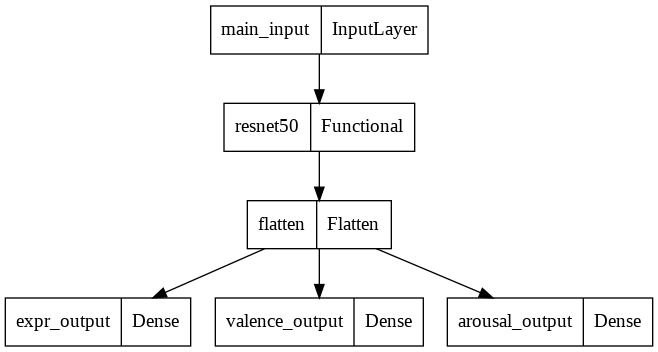

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)

for layer in resnet.layers:
    layer.trainable = True

inputs = Input(shape=(96, 96, 3), name='main_input')
main_branch = resnet(inputs)
main_branch = Flatten()(main_branch)
expr_branch = Dense(8, activation='softmax', name='expr_output')(main_branch)
valence_branch = Dense(1, name='valence_output')(main_branch)
arousal_branch = Dense(1, name='arousal_output')(main_branch)
model = Model(inputs = inputs,
     outputs = [expr_branch, valence_branch, arousal_branch])
plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss={'expr_output': 'sparse_categorical_crossentropy', 'valence_output': 'mean_squared_error', 'arousal_output': 'mean_squared_error'},metrics={'expr_output': 'accuracy',
        'valence_output': 'mean_squared_error',
        'arousal_output': 'mean_squared_error'})

In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
1417/1417 [==============================] - ETA: 0s - loss: 1.0031 - expr_output_loss: 0.8028 - valence_output_loss: 0.1187 - arousal_output_loss: 0.0815 - expr_output_accuracy: 0.7190 - valence_output_mean_squared_error: 0.1187 - arousal_output_mean_squared_error: 0.0815
Epoch 1: saving model to /content/weights0.3893.hdf5
1417/1417 [==============================] - 700s 479ms/step - loss: 1.0031 - expr_output_loss: 0.8028 - valence_output_loss: 0.1187 - arousal_output_loss: 0.0815 - expr_output_accuracy: 0.7190 - valence_output_mean_squared_error: 0.1187 - arousal_output_mean_squared_error: 0.0815 - val_loss: 2.2269 - val_expr_output_loss: 1.8917 - val_valence_output_loss: 0.1901 - val_arousal_output_loss: 0.1451 - val_expr_output_accuracy: 0.3893 - val_valence_output_mean_squared_error: 0.1901 - val_arousal_output_mean_squared_error: 0.1451
Epoch 2/10
1417/1417 [==============================] - ETA: 0s - loss: 0.8659 - expr_output_loss: 0.7138 - valence_output_loss: 0.

In [ ]:
model.load_weights("/content/weights0.4601.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
y_pred_expr

array([0, 0, 4, ..., 6, 3, 0])

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.4593648412103026
f1 score 0.41528358050109215
average accuracy 0.45925300601202407
f1 score per class 
 [0.4441989  0.59897172 0.5511811  0.4048583  0.45911047 0.31832797
 0.52190476 0.02371542]
accuracy per class 
 [0.804      0.932      0.56       0.3        0.32       0.198
 0.548      0.01202405]


Regression metrics

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.17659090763704932
ΜSΕ arousal 0.14418122143608159
Pearson valence 6.117813720896148e-12
Pearson arousal 9.721862898048883e-11


###### Horizontal flip + batch size 91,93

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=91,class_mode="multi_output")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="multi_output")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

3161
43


94781440/94765736 [==============================] - 1s 0us/step


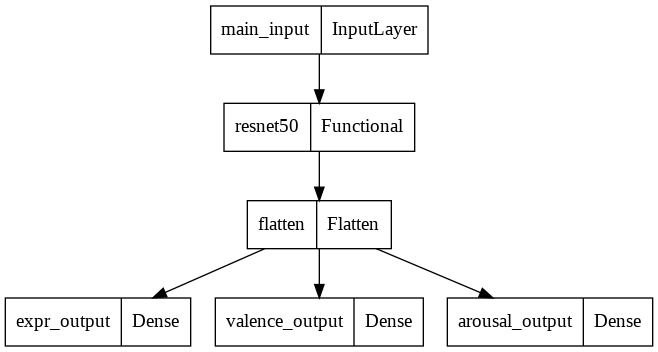

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)

for layer in resnet.layers:
    layer.trainable = True

inputs = Input(shape=(96, 96, 3), name='main_input')
main_branch = resnet(inputs)
main_branch = Flatten()(main_branch)
expr_branch = Dense(8, activation='softmax', name='expr_output')(main_branch)
valence_branch = Dense(1, name='valence_output')(main_branch)
arousal_branch = Dense(1, name='arousal_output')(main_branch)
model = Model(inputs = inputs,
     outputs = [expr_branch, valence_branch, arousal_branch])
plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss={'expr_output': 'sparse_categorical_crossentropy', 'valence_output': 'mean_squared_error', 'arousal_output': 'mean_squared_error'},metrics={'expr_output': 'accuracy',
        'valence_output': 'mean_squared_error',
        'arousal_output': 'mean_squared_error'})

In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=10,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
3161/3161 [==============================] - ETA: 0s - loss: 1.0101 - expr_output_loss: 0.8160 - valence_output_loss: 0.1194 - arousal_output_loss: 0.0747 - expr_output_accuracy: 0.7160 - valence_output_mean_squared_error: 0.1194 - arousal_output_mean_squared_error: 0.0747
Epoch 1: saving model to /content/weights0.3831.hdf5
3161/3161 [==============================] - 743s 228ms/step - loss: 1.0101 - expr_output_loss: 0.8160 - valence_output_loss: 0.1194 - arousal_output_loss: 0.0747 - expr_output_accuracy: 0.7160 - valence_output_mean_squared_error: 0.1194 - arousal_output_mean_squared_error: 0.0747 - val_loss: 2.2446 - val_expr_output_loss: 1.9358 - val_valence_output_loss: 0.1863 - val_arousal_output_loss: 0.1225 - val_expr_output_accuracy: 0.3831 - val_valence_output_mean_squared_error: 0.1863 - val_arousal_output_mean_squared_error: 0.1225
Epoch 2/10
3161/3161 [==============================] - ETA: 0s - loss: 0.8961 - expr_output_loss: 0.7379 - valence_output_loss: 0.

In [ ]:
model.load_weights("/content/weights0.4604.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
print(y_true_expr)
print(y_true_valence)
print(y_true_arousal)

[0 0 4 ... 6 3 0]
[-0.176846 -0.135501 -0.11451  ... -0.416183  0.176846 -0.147493]
[-0.0776398   0.00483933  0.857748   ...  0.701703    0.599551
 -0.379267  ]


In [ ]:
print("Expression preds \n", y_pred[0])
print("Valence preds \n", y_pred[1])
print("Arousal preds \n", y_pred[2])

Expression preds 
 [[6.5516698e-01 2.6861699e-03 2.3214206e-01 ... 4.0636542e-03
  1.0123847e-01 3.0221620e-03]
 [7.8722239e-01 2.0185234e-03 1.7433244e-01 ... 2.0054106e-03
  3.0713543e-02 2.1539528e-03]
 [1.5966429e-03 2.4400868e-05 1.2779108e-03 ... 5.6709159e-05
  6.2420485e-03 2.5318161e-07]
 ...
 [7.3683724e-02 8.0618903e-04 4.7759455e-02 ... 2.1162823e-02
  7.0319450e-01 5.3997908e-05]
 [7.7482544e-02 3.3934431e-03 8.1782369e-03 ... 1.1638470e-03
  5.6040561e-04 1.3501331e-04]
 [5.3694284e-01 5.3780345e-04 3.1130394e-01 ... 2.2298843e-03
  1.0293389e-01 3.6306377e-04]]
Valence preds 
 [[-0.19221641]
 [-0.14020129]
 [ 0.08111131]
 ...
 [-0.40331554]
 [ 0.07436817]
 [-0.2918096 ]]
Arousal preds 
 [[-0.0501477 ]
 [-0.0892543 ]
 [ 0.9244172 ]
 ...
 [ 0.5162809 ]
 [ 0.6490005 ]
 [-0.07744663]]


In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
y_pred_expr

array([0, 0, 4, ..., 6, 3, 0])

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.4593648412103026
f1 score 0.4145665758263546
average accuracy 0.45925450901803605
f1 score per class 
 [0.43412652 0.6080207  0.55010661 0.45878136 0.46511628 0.25042882
 0.51458886 0.03536346]
accuracy per class 
 [0.748      0.94       0.516      0.384      0.34       0.146
 0.582      0.01803607]


Regression metrics

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.1913571277919875
ΜSΕ arousal 0.13406761469797757
Pearson valence 7.04442129628724e-11
Pearson arousal 9.407544881989693e-11


#### lr = 10^-2

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=203,class_mode="multi_output")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="multi_output")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


94781440/94765736 [==============================] - 1s 0us/step


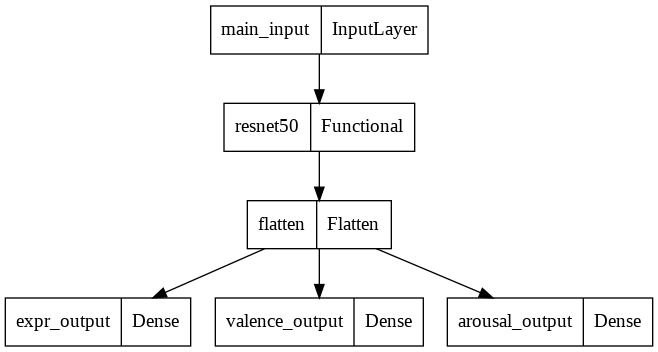

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)

for layer in resnet.layers:
    layer.trainable = True

inputs = Input(shape=(96, 96, 3), name='main_input')
main_branch = resnet(inputs)
main_branch = Flatten()(main_branch)
expr_branch = Dense(8, activation='softmax', name='expr_output')(main_branch)
valence_branch = Dense(1, name='valence_output')(main_branch)
arousal_branch = Dense(1, name='arousal_output')(main_branch)
model = Model(inputs = inputs,
     outputs = [expr_branch, valence_branch, arousal_branch])
plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss={'expr_output': 'sparse_categorical_crossentropy', 'valence_output': 'mean_squared_error', 'arousal_output': 'mean_squared_error'},metrics={'expr_output': 'accuracy',
        'valence_output': tf.keras.metrics.MeanSquaredError(),
        'arousal_output': tf.keras.metrics.MeanSquaredError()})

In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=20,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
1417/1417 [==============================] - ETA: 0s - loss: 2.9131 - expr_output_loss: 1.3875 - valence_output_loss: 0.7755 - arousal_output_loss: 0.7500 - expr_output_accuracy: 0.5372 - valence_output_mean_squared_error: 0.7755 - arousal_output_mean_squared_error: 0.7500
Epoch 1: saving model to /content/weights0.2193.hdf5
1417/1417 [==============================] - 698s 475ms/step - loss: 2.9131 - expr_output_loss: 1.3875 - valence_output_loss: 0.7755 - arousal_output_loss: 0.7500 - expr_output_accuracy: 0.5372 - valence_output_mean_squared_error: 0.7755 - arousal_output_mean_squared_error: 0.7500 - val_loss: 3.1125 - val_expr_output_loss: 2.5878 - val_valence_output_loss: 0.3382 - val_arousal_output_loss: 0.1865 - val_expr_output_accuracy: 0.2193 - val_valence_output_mean_squared_error: 0.3382 - val_arousal_output_mean_squared_error: 0.1865
Epoch 2/20
1417/1417 [==============================] - ETA: 0s - loss: 1.1719 - expr_output_loss: 0.9637 - valence_output_loss: 0.

In [ ]:
model.load_weights("/content/weights0.4991.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
print(y_true_expr)
print(y_true_valence)
print(y_true_arousal)

[0 0 4 ... 6 3 0]
[-0.176846 -0.135501 -0.11451  ... -0.416183  0.176846 -0.147493]
[-0.0776398   0.00483933  0.857748   ...  0.701703    0.599551
 -0.379267  ]


In [ ]:
print("Expression preds \n", y_pred[0])
print("Valence preds \n", y_pred[1])
print("Arousal preds \n", y_pred[2])

Expression preds 
 [[4.6577123e-01 2.4751280e-04 4.6244606e-01 ... 2.0163410e-04
  6.9992349e-02 1.0840039e-03]
 [9.7577763e-01 3.7780246e-05 2.0813452e-02 ... 6.8675807e-05
  3.1323126e-03 1.0916086e-04]
 [5.3270079e-02 3.0122793e-04 2.5707288e-03 ... 1.2263050e-03
  1.4432032e-02 1.1943249e-05]
 ...
 [8.4446631e-02 1.4364773e-04 1.9357365e-02 ... 3.4603186e-02
  8.0695820e-01 2.2472139e-04]
 [1.5244024e-02 3.8138037e-03 1.1162305e-03 ... 9.6587138e-04
  2.4620234e-03 4.6648202e-05]
 [2.1144587e-01 7.1380732e-06 7.7734452e-01 ... 1.5623649e-04
  6.7959405e-03 1.3185019e-04]]
Valence preds 
 [[-0.26079103]
 [-0.07971779]
 [ 0.03367232]
 ...
 [-0.3510907 ]
 [ 0.10947989]
 [-0.36040732]]
Arousal preds 
 [[-0.1430552 ]
 [-0.1013194 ]
 [ 0.5103485 ]
 ...
 [ 0.36714616]
 [ 0.6020874 ]
 [-0.25251767]]


In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
y_pred_expr

array([0, 0, 4, ..., 5, 3, 0])

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.4548637159289822
f1 score 0.4133512641525664
average accuracy 0.4547550100200401
f1 score per class 
 [0.43753884 0.60477454 0.51339672 0.42264151 0.47802198 0.31428571
 0.49716446 0.03898635]
accuracy per class 
 [0.704      0.912      0.594      0.336      0.348      0.198
 0.526      0.02004008]


Regression metrics

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.21479616642961133
ΜSΕ arousal 0.18052682738121198
Pearson valence -7.875324697925734e-11
Pearson arousal 1.1027759434789619e-11


#### lr = 10^-1

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=img_gen.flow_from_dataframe(dataframe=train_dataset,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=203,class_mode="multi_output")

Found 287651 validated image filenames.


In [ ]:
test_generator=img_gen.flow_from_dataframe(dataframe=test_dataset_va,x_col="file_loc",y_col=['expr','valence','arousal'],target_size=(96, 96),batch_size=93,shuffle=False,class_mode="multi_output")

Found 3999 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN_resnet = train_generator.n//train_generator.batch_size
print(STEP_SIZE_TRAIN_resnet)
STEP_SIZE_TEST_resnet = test_generator.n//test_generator.batch_size
print(STEP_SIZE_TEST_resnet)

1417
43


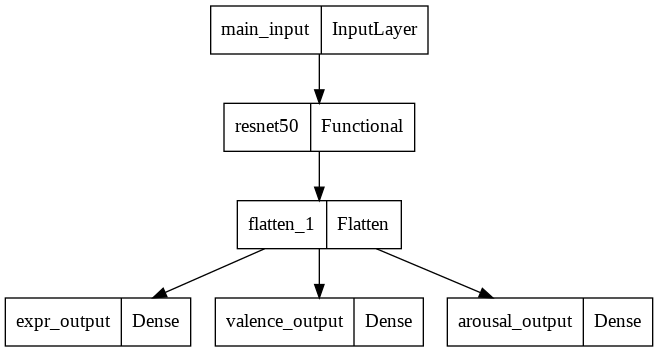

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
resnet = tf.keras.applications.ResNet50( 
    include_top=False ,
    weights='imagenet' ,
    input_shape=(96, 96, 3) ,
    pooling="avg"
)

for layer in resnet.layers:
    layer.trainable = True

inputs = Input(shape=(96, 96, 3), name='main_input')
main_branch = resnet(inputs)
new_branch = Flatten()(main_branch)
expr_branch = Dense(8, activation='softmax', name='expr_output')(new_branch)
valence_branch = Dense(1, name='valence_output')(new_branch)
arousal_branch = Dense(1, name='arousal_output')(new_branch)
model = Model(inputs = inputs,
     outputs = [expr_branch, valence_branch, arousal_branch])
plot_model(model)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss={'expr_output': 'sparse_categorical_crossentropy', 'valence_output': 'mean_squared_error', 'arousal_output': 'mean_squared_error'},metrics={'expr_output': 'accuracy',
        'valence_output': 'mean_squared_error',
        'arousal_output': 'mean_squared_error'})

In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=15,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
1417/1417 [==============================] - ETA: 0s - loss: 1.0024 - expr_output_loss: 0.7997 - valence_output_loss: 0.1196 - arousal_output_loss: 0.0831 - expr_output_accuracy: 0.7209 - valence_output_mean_squared_error: 0.1196 - arousal_output_mean_squared_error: 0.0831
Epoch 1: saving model to /content/weights0.3868.hdf5
1417/1417 [==============================] - 629s 440ms/step - loss: 1.0024 - expr_output_loss: 0.7997 - valence_output_loss: 0.1196 - arousal_output_loss: 0.0831 - expr_output_accuracy: 0.7209 - valence_output_mean_squared_error: 0.1196 - arousal_output_mean_squared_error: 0.0831 - val_loss: 2.3634 - val_expr_output_loss: 2.0032 - val_valence_output_loss: 0.2155 - val_arousal_output_loss: 0.1446 - val_expr_output_accuracy: 0.3868 - val_valence_output_mean_squared_error: 0.2155 - val_arousal_output_mean_squared_error: 0.1446
Epoch 2/15
1417/1417 [==============================] - ETA: 0s - loss: 0.8546 - expr_output_loss: 0.7046 - valence_output_loss: 0.

In [ ]:
model.load_weights("/content/weights0.4649.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.4648662165541385
f1 score 0.4244493598098701
average accuracy 0.4647610220440882
f1 score per class 
 [0.44714038 0.63597734 0.44132653 0.45114596 0.54114713 0.27483444
 0.52021358 0.08380952]
accuracy per class 
 [0.774      0.898      0.346      0.374      0.434      0.166
 0.682      0.04408818]


In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.16170609071170874
ΜSΕ arousal 0.11979994395521572
Pearson valence -1.1532320931539886e-10
Pearson arousal 1.8739860357941396e-11


In [ ]:
import keras

model_path = f"/content/weights" + "{val_expr_output_accuracy:.4f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_weights_only=True,
    verbose=1
)

history = model.fit_generator(
                   train_generator,
                   epochs=20,
                   steps_per_epoch=STEP_SIZE_TRAIN_resnet,
                   validation_data=test_generator,
                   validation_steps=STEP_SIZE_TEST_resnet,
                   max_queue_size=1,
                   shuffle=True,
                   callbacks=[checkpoint],
                   verbose=1
                  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
1417/1417 [==============================] - ETA: 0s - loss: 0.9992 - expr_output_loss: 0.7989 - valence_output_loss: 0.1199 - arousal_output_loss: 0.0804 - expr_output_accuracy: 0.7218 - valence_output_mean_squared_error: 0.1199 - arousal_output_mean_squared_error: 0.0804
Epoch 1: saving model to /content/weights0.4099.hdf5
1417/1417 [==============================] - 681s 465ms/step - loss: 0.9992 - expr_output_loss: 0.7989 - valence_output_loss: 0.1199 - arousal_output_loss: 0.0804 - expr_output_accuracy: 0.7218 - valence_output_mean_squared_error: 0.1199 - arousal_output_mean_squared_error: 0.0804 - val_loss: 2.2008 - val_expr_output_loss: 1.8499 - val_valence_output_loss: 0.1895 - val_arousal_output_loss: 0.1614 - val_expr_output_accuracy: 0.4099 - val_valence_output_mean_squared_error: 0.1895 - val_arousal_output_mean_squared_error: 0.1614
Epoch 2/20
1417/1417 [==============================] - ETA: 0s - loss: 0.8548 - expr_output_loss: 0.7047 - valence_output_loss: 0.

In [ ]:
model.load_weights("/content/weights0.3733.hdf5")

In [ ]:
y_pred = model.predict(test_generator)
y_true_expr = test_dataset_va["expr"].to_numpy()
y_true_valence = test_dataset_va["valence"].to_numpy()
y_true_arousal = test_dataset_va["arousal"].to_numpy()

In [ ]:
print(y_true_expr)
print(y_true_valence)
print(y_true_arousal)

[0 0 4 ... 6 3 0]
[-0.176846 -0.135501 -0.11451  ... -0.416183  0.176846 -0.147493]
[-0.0776398   0.00483933  0.857748   ...  0.701703    0.599551
 -0.379267  ]


In [ ]:
print("Expression preds \n", y_pred[0])
print("Valence preds \n", y_pred[1])
print("Arousal preds \n", y_pred[2])

Expression preds 
 [[9.8441792e-01 7.6285454e-07 5.6869804e-04 ... 5.1908646e-08
  1.5011846e-02 7.0289650e-07]
 [9.9854904e-01 6.3618103e-07 1.4380408e-03 ... 3.1131130e-08
  1.0736220e-05 1.8100232e-07]
 [1.0566815e-04 2.5649041e-07 8.2827792e-05 ... 5.9707168e-07
  8.4536374e-03 7.6281786e-10]
 ...
 [1.4979663e-04 7.3178221e-06 6.7553051e-06 ... 3.1758571e-01
  6.8222982e-01 1.1870637e-07]
 [1.6906017e-01 1.6550436e-07 1.6479885e-06 ... 5.2883775e-07
  7.9631545e-06 2.0662148e-08]
 [8.4182739e-01 8.9125258e-08 1.5770644e-01 ... 3.0531631e-08
  4.6385161e-04 5.4853342e-07]]
Valence preds 
 [[-0.1213381 ]
 [-0.1322049 ]
 [-0.21306284]
 ...
 [-0.5491332 ]
 [ 0.02076511]
 [-0.24247338]]
Arousal preds 
 [[-0.02977264]
 [-0.03867356]
 [ 0.7828739 ]
 ...
 [ 0.6348422 ]
 [ 0.6038436 ]
 [-0.11389755]]


In [ ]:
y_pred_expr = np.argmax(y_pred[0], axis=1)
y_pred_valence = y_pred[1]
y_pred_arousal = y_pred[2]

In [ ]:
y_pred_expr

array([0, 0, 4, ..., 6, 3, 0])

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from statistics import mean
print("accuracy",accuracy_score(y_true_expr, y_pred_expr))
print("f1 score",f1_score(y_true_expr, y_pred_expr,average='macro'))
print("average accuracy",mean(confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal()))
print("f1 score per class \n",f1_score(y_true_expr, y_pred_expr,average=None))
print("accuracy per class \n",confusion_matrix(y_true_expr, y_pred_expr, normalize='true').diagonal())

accuracy 0.46786696674168543
f1 score 0.43891495285993987
average accuracy 0.4677640280561122
f1 score per class 
 [0.43939394 0.62957746 0.49848024 0.47231638 0.46022727 0.41853933
 0.48888889 0.1038961 ]
accuracy per class 
 [0.754      0.894      0.492      0.418      0.324      0.298
 0.506      0.05611222]


Regression metrics

In [ ]:
def pearson(predictions, labels): 
    pred_mean, pred_var = tf.nn.moments(predictions, (0,))
    gt_mean, gt_var = tf.nn.moments(labels, (0,))
    mean_cent_prod = tf.reduce_mean((predictions - pred_mean) * (labels - gt_mean))

    return  mean_cent_prod / (tf.math.sqrt(pred_var) * tf.math.sqrt(gt_var))

In [ ]:
print("ΜSΕ valence",mean_squared_error(y_true_valence, y_pred_valence ))
print("ΜSΕ arousal",mean_squared_error(y_true_arousal, y_pred_arousal ))
print("Pearson valence",float(pearson(y_pred_valence.astype('float32'),y_true_valence.astype('float32'))))
print("Pearson arousal",float(pearson(y_pred_arousal.astype('float32'),y_true_arousal.astype('float32'))))

ΜSΕ valence 0.18714494556328024
ΜSΕ arousal 0.1504840863633223
Pearson valence 2.9686263863792917e-11
Pearson arousal -3.4643773960674196e-11
